<b>Problem Explained</b>
While working with Credit One they have asked us to analyze their customers who have been defaulting on loan payments. They have been realizing that over the years more customers have been defaulting and they want to understand if we can find any patterns in order to find a way to reduce the defaults and reduce the risk of losing business.

On this first part we will be analysing the data to understand what we have in hands. Understanding the customer is fundamental to understand why they default. 

Our data is a dataframe with 30,000 customers with defaulted payments in Taiwan with information which includes: 
Gender, education, marital status, amount of credit given, history of past payments, amount of bill statement and amount of previous payment. 

<h3>1. Data Preparation</h3>

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
credit = pd.read_csv('default of credit card clients.csv', header =1)
#The first rows of the data frame
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#Checking the data types of the variables
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [52]:
#Description of the variables
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [14]:
#Counts the NAs
credit.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
#Removes the column ID which is irrelevant for our analysis
credit = credit.drop(columns=['ID'])

In [6]:
#Assign AGE into four bins
credit['AGE'] = pd.cut(x=credit['AGE'], bins=[20, 35, 50, 65, 79], labels=[1,2,3,4])

In [7]:
#Confirming the change
credit['AGE'].value_counts()

1    16809
2    10922
3     2183
4       86
Name: AGE, dtype: int64

In [9]:
#Checking the data types of the variables
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int8
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                

In [7]:
credit = credit.rename(columns={"default payment next month": "DEFAULT",})

In [8]:
#Since 4, 5, 6 and 0 are "others" lets replace all of them by 4
credit['EDUCATION'] = credit['EDUCATION'].replace([0,5,6], 4)
#And confirm the change
credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [14]:
#This is our final table after data cleaning 
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,0,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,0,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,1,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,2,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<h3> 2. Data Vizualization </h3>

In [73]:
header = redit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


In [168]:
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

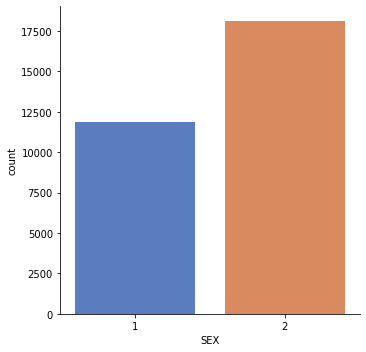

In [26]:
sns.catplot('SEX', data=credit, kind='count', palette="muted")

In [ ]:
The dataset contains more 2= female than 1= male. 

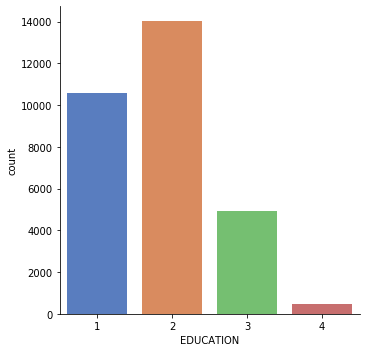

In [25]:
#Using seaborn to plot the count of clients in each education category
ec = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1, palette="muted")
ec.set_xlabels('EDUCATION')

In [19]:
# Number of men and women on each education
credit.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX  EDUCATION
1    1            4354
     2            5374
     3            1990
     4             170
2    1            6231
     2            8656
     3            2927
     4             298
Name: SEX, dtype: int64

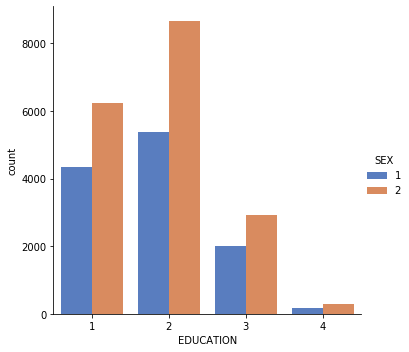

In [24]:
#Graph with with Education divided per Sex
g = sns.catplot('EDUCATION', data=credit, hue='SEX', kind='count', palette="muted")
g.set_xlabels('EDUCATION')

There are no strong diferences between male and female, but it seems to indicate the the female have higher education degree than male. 

In [21]:
#Men and women in each of the age category
credit.groupby(['AGE','SEX'])['AGE'].count()

AGE  SEX
0    1       6151
     2      10658
1    1       4641
     2       6281
2    1       1050
     2       1133
3    1         46
     2         40
Name: AGE, dtype: int64

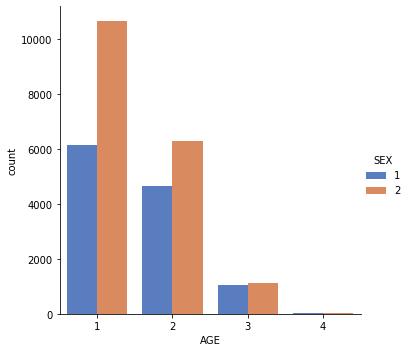

In [23]:
#Using seaborn to group by men and women in each of the age category
a = sns.catplot('AGE', data=credit, hue='SEX', kind='count', palette="muted")
a.set_xlabels('AGE')

There are more women on the age bracket from 21 to 50. On the older bracket, above 50, the amount is identical. 

In [12]:
#Default count   0=not default, 1=default
credit.groupby('DEFAULT')['DEFAULT'].count()

DEFAULT
0    23364
1     6636
Name: DEFAULT, dtype: int64

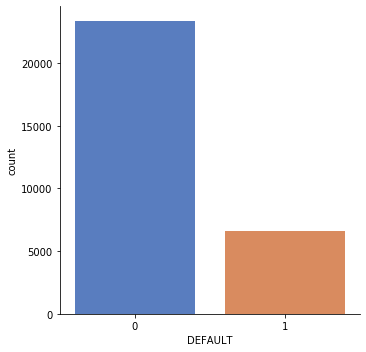

In [22]:
#Using seaborn to count default
sns.catplot('DEFAULT', data=credit, kind='count', palette="muted")

Out of the whole customers analysed, 22% of them default. 

<h3> What affects the Default </h3>

In [18]:
# Number of clients who are default grouped by sex. 
credit.groupby(['SEX', 'DEFAULT'])['SEX'].count()

SEX  DEFAULT
1    0           9015
     1           2873
2    0          14349
     1           3763
Name: SEX, dtype: int64

24% of male default vs 21% of female

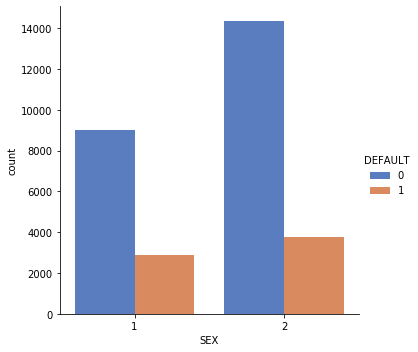

In [21]:
#Graph with with Default divided per SEX
g = sns.catplot('SEX', data=credit, hue='DEFAULT', kind='count', palette="muted")
g.set_xlabels('SEX')

Blue = not default; Orange = default. 1 = Male, 2 = Female

In [31]:
# Number of clients who are default grouped by sex. 
credit.groupby(['EDUCATION', 'DEFAULT'])['EDUCATION'].count()

EDUCATION  DEFAULT
1          0           8549
           1           2036
2          0          10700
           1           3330
3          0           3680
           1           1237
4          0            435
           1             33
Name: EDUCATION, dtype: int64

Gradute 1 = 19% default; University 2 = 23,7%; High School = 25,15%; Others = 7%
Lower education means slight higher default rate

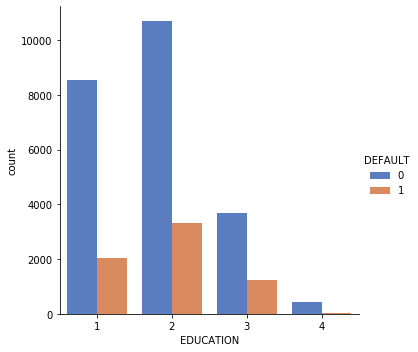

In [29]:
#Graph with with Default divided per EDUCATION
g = sns.catplot('EDUCATION', data=credit, hue='DEFAULT', kind='count', palette="muted")
g.set_xlabels('EDUCATION')

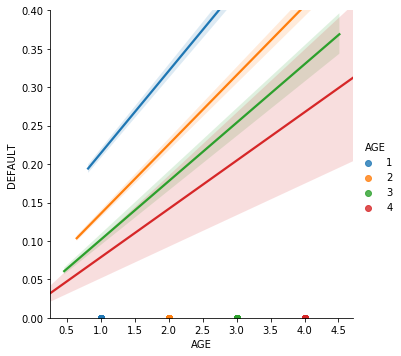

In [39]:
apl = sns.lmplot('AGE','DEFAULT',hue='AGE',data=credit)
apl.set(ylim=(0,0.4))

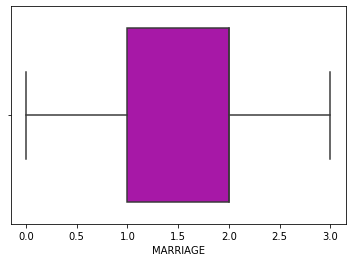

In [45]:
#Graph with with Default divided per Marriage
sns.boxplot('MARRIAGE', data=credit, hue='DEFAULT', palette=["m", "g"])


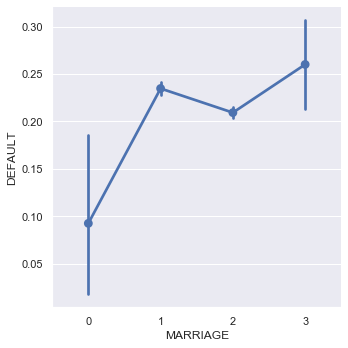

In [54]:
#Marital Status Factor 
sns.catplot('MARRIAGE', 'DEFAULT', data=credit, kind='point')

In [ ]:
0=Others, 1=Married, 2=Single, 3=Divorce
The single clientes are less prone to get divorced. 

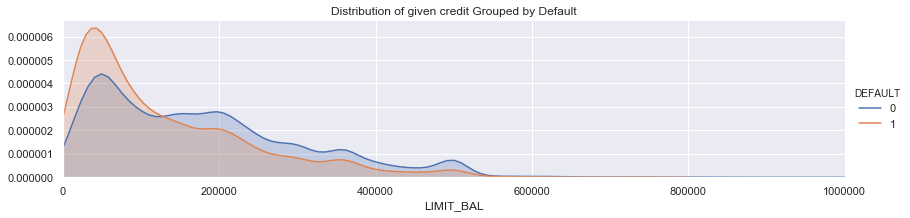

In [60]:
fig = sns.FacetGrid(credit, hue='DEFAULT', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
largest = credit['LIMIT_BAL'].max()
fig.set(xlim=(0,largest))
fig.set(title='Distribution of given credit Grouped by Default')
fig.add_legend()

We can see clearly that the clients that ask for smaller credits have a greater possibility of default. 

In [166]:
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.219161 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.014232 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.219161  0.014232   1.000000 -0.143464  0.175061  0.105364   
MARRIAGE   -0.108139 -0.031389  -0.143464  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.175061 -0.414170  1.000000 -0.039447   
PAY_0      -0.271214 -0.057643   0.105364  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.121566  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.114025  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.108793  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.097520  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.082316  0.034345 -0.048773  0.474553   
BILL_AMT1   0.285430 -0.033642   0.023581 -0.023472  0.056239  0.187068   
BILL_AMT2   0.278314 -0.0

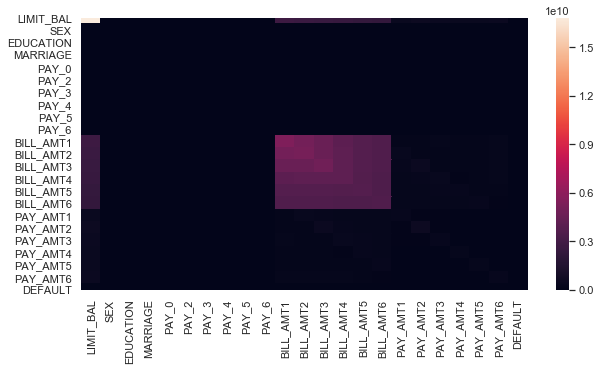

In [61]:
#Covariance matrix and use heatmap to present it visually
covMat = credit.cov()
plt.figure(figsize = (10,5))
sns.heatmap(covMat)

<b>Conclusions</b>
The typical client that defaults is a married or divorced male with high school education which gets a small credit loan.  